<a href="https://colab.research.google.com/github/Hamphiritha/Hamphiritha-B_24BAD403/blob/main/DSV_Assignment_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2 – Data Science Libraries

Name: Hamphiritha BS

Roll No: 24BAD403


In [28]:
# Q1 Rolling Sensor Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

sensor = np.array([22.1,22.5,23.0,24.8,25.1,26.0,27.5,28.0])
s = pd.Series(sensor)

df = pd.DataFrame({
    "Sensor Value": s,
    "Rolling Mean": s.rolling(3).mean(),
    "Rolling Std": s.rolling(3).std()
})

df["Anomaly"] = abs(df["Sensor Value"]-df["Rolling Mean"]) > 1.5*df["Rolling Std"]

display(df.round(6))





Hamphiritha BS - 24BAD403



,Sensor Value,Rolling Mean,Rolling Std,Anomaly
0,22.1,NaN,NaN,False
1,22.5,NaN,NaN,False
2,23.0,22.533333,0.450925,False
3,24.8,23.433333,1.209683,False
4,25.1,24.300000,1.135782,False
5,26.0,25.300000,0.624500,False
6,27.5,26.200000,1.212436,False
7,28.0,27.166667,1.040833,False


In [38]:

# Q2 Distance Matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

points = np.array([[2,3],[5,4],[8,7],[1,6]])

diff = points[:,None,:] - points[None,:,:]
dist = np.sqrt((diff**2).sum(axis=2))

print("Distance Matrix :\n")
print(np.round(dist,2))




Hamphiritha BS - 24BAD403

Distance Matrix :

[[0.   3.16 7.21 3.16]
 [3.16 0.   4.24 4.47]
 [7.21 4.24 0.   7.07]
 [3.16 4.47 7.07 0.  ]]


In [41]:

# Q3 Monte Carlo Risk

import numpy as np
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

np.random.seed(10)
returns = np.random.normal(0.001, 0.02, 10000)

print(f"Expected Return        : {np.mean(returns):.5f}")
print(f"Probability of Loss    : {np.mean(returns<0):.4f}")
ci = np.percentile(returns,[2.5,97.5])
print(f"95% Confidence Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")


Hamphiritha BS - 24BAD403

Expected Return        : 0.00110
Probability of Loss    : 0.4746
95% Confidence Interval: [-0.0379, 0.0400]


In [69]:

# Q4 Sparse Interaction

import numpy as np
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

inter = np.array([
    [0,0,5,0],
    [1,0,0,0],
    [0,0,0,3],
    [4,0,0,0]
])

sparsity = np.sum(inter==0)/inter.size*100
print("Sparsity %:", sparsity)

row_sum = inter.sum(axis=1, keepdims=True)
norm = inter / np.where(row_sum==0,1,row_sum)

print("\nNormalized Matrix:\n", norm)
print("\nTop Interaction Index:", np.argmax(inter,axis=1))



Hamphiritha BS - 24BAD403

Sparsity %: 75.0

Normalized Matrix:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

Top Interaction Index: [2 0 3 0]


In [68]:

# Q5 Student Performance

import pandas as pd
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

data = {
    "Student": ["A", "B", "C", "D", "E"],
    "Math": [78, 85, 67, 90, 72],
    "Physics": [74, 88, 69, 92, 70],
    "Attendance": [82, 90, 76, 95, 80]
}

df = pd.DataFrame(data)

df["Average"] = df[["Math", "Physics", "Attendance"]].mean(axis=1)

def grade(avg):
    if avg >= 90:
        return "A"
    elif avg >= 80:
        return "B"
    elif avg >= 70:
        return "C"
    else:
        return "D"

df["Grade"] = df["Average"].apply(grade)
df["Average"] = df["Average"].round(6)

print("Student Performance Table : \n")
print(df.to_string(index=False))

top = df.loc[df["Average"].idxmax()]

print("\nTop Performer:\n")
for col in df.columns:
    print(f"{col:<12} {top[col]}")




Hamphiritha BS - 24BAD403

Student Performance Table : 

Student  Math  Physics  Attendance   Average Grade
      A    78       74          82 78.000000     C
      B    85       88          90 87.666667     B
      C    67       69          76 70.666667     C
      D    90       92          95 92.333333     A
      E    72       70          80 74.000000     C

Top Performer:

Student      D
Math         90
Physics      92
Attendance   95
Average      92.333333
Grade        A


In [63]:

# Q6 Time Series Feature Engineering

import numpy as np
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

timestamps = pd.date_range("2024-01-01", periods=10, freq="6h")


df = pd.DataFrame({
    "Timestamp": timestamps,
    "Value": [12, 18, 20, 22, 19, 15, 14, 17, 21, 23]
})


df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day

df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

df





Hamphiritha BS - 24BAD403



,Timestamp,Value,Hour,Day,Hour_sin,Hour_cos
0,2024-01-01 00:00:00,12,0,1,0.000000e+00,1.000000e+00
1,2024-01-01 06:00:00,18,6,1,1.000000e+00,6.123234e-17
2,2024-01-01 12:00:00,20,12,1,1.224647e-16,-1.000000e+00
3,2024-01-01 18:00:00,22,18,1,-1.000000e+00,-1.836970e-16
4,2024-01-02 00:00:00,19,0,2,0.000000e+00,1.000000e+00
5,2024-01-02 06:00:00,15,6,2,1.000000e+00,6.123234e-17
6,2024-01-02 12:00:00,14,12,2,1.224647e-16,-1.000000e+00
7,2024-01-02 18:00:00,17,18,2,-1.000000e+00,-1.836970e-16
8,2024-01-03 00:00:00,21,0,3,0.000000e+00,1.000000e+00
9,2024-01-03 06:00:00,23,6,3,1.000000e+00,6.123234e-17


In [67]:

# Q7 Data Leakage Detection

import numpy as np
import pandas as pd
import matplotlib.pyplot as pltdata

print("Hamphiritha BS - 24BAD403\n")

train = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "score": [65, 70, 80, 90],
    "result": [0, 0, 1, 1]
})

test = pd.DataFrame({
    "id": [3, 5],
    "score": [80, 75],
    "result": [1, 0]
})

overlapping_ids = set(train["id"]).intersection(set(test["id"]))

leakage_percentage = (len(overlapping_ids) / len(test)) * 100


print("Overlapping IDs:", overlapping_ids)
print("Leaked column: result")
print("Leakage Percentage:", leakage_percentage, "%")





Hamphiritha BS - 24BAD403

Overlapping IDs: {3}
Leaked column: result
Leakage Percentage: 50.0 %


In [16]:

# Q8 Memory Optimization

import pandas as pd
import numpy as np

df = pd.DataFrame({
"A": np.random.randint(0,1000,10000),
"B": np.random.rand(10000),
"C": ["category"]*10000
})

before = df.memory_usage(deep=True).sum()

df["A"] = df["A"].astype("int16")
df["B"] = df["B"].astype("float32")
df["C"] = df["C"].astype("category")

after = df.memory_usage(deep=True).sum()

print("Hamphiritha BS - 24BAD403\n")
print("Memory Before:", before)
print("Memory After:", after)


Hamphiritha BS - 24BAD403

Memory Before: 730132
Memory After: 70297


Hamphiritha BS - 24BAD403



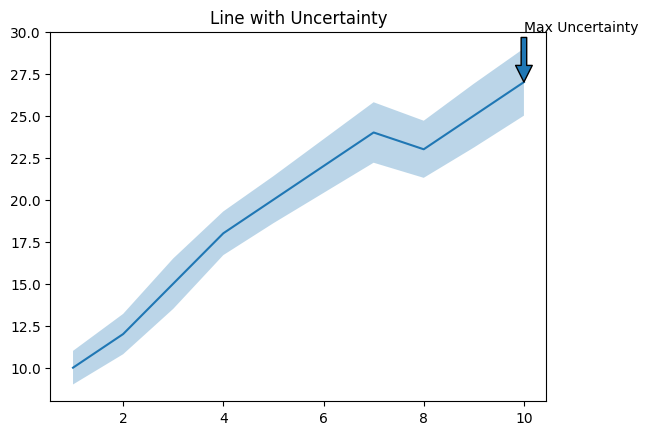

In [18]:

# Q9 Uncertainty Visualization

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,11)
y = np.array([10,12,15,18,20,22,24,23,25,27])
error = np.array([1,1.2,1.5,1.3,1.4,1.6,1.8,1.7,1.9,2.0])

plt.plot(x,y)
plt.fill_between(x,y-error,y+error,alpha=0.3)

i = np.argmax(error)
plt.annotate("Max Uncertainty",(x[i],y[i]),xytext=(x[i],y[i]+3),
             arrowprops=dict())

print("Hamphiritha BS - 24BAD403\n")
plt.title("Line with Uncertainty")
plt.show()


Hamphiritha BS - 24BAD403



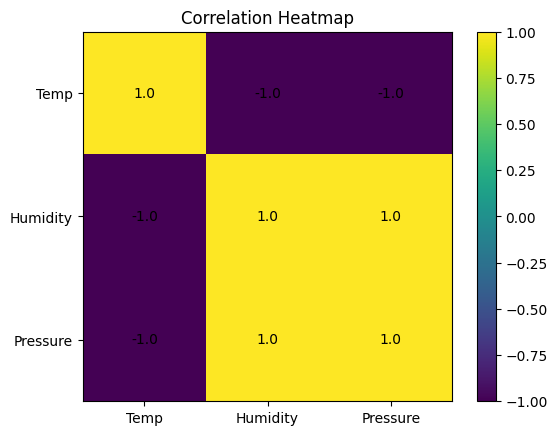

In [70]:

# Q10 Correlation Heatmap (Matplotlib Only)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
"Temp":[30,32,34,36,38],
"Humidity":[70,65,60,55,50],
"Pressure":[1012,1010,1008,1006,1004]
})

corr = df.corr()

plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j,i,round(corr.iloc[i,j],2),ha="center",va="center")

print("Hamphiritha BS - 24BAD403\n")
plt.title("Correlation Heatmap")
plt.show()
